# Some notes on special relativity (SR)

  * Cornerstone 1: *The laws of physics are the same in all inertial frames* [1] *of reference.* 
  * Cornerstone 2: *The measured speed of light ($c$) is always constant* [2] *in all inertial frames of reference*

A reference frame is simply where an observer or event occurs.  For example we can consider a train platform as one reference frame.  If someone is standing on another platform across the tracks, that is a different location within the same reference frame.  If a train passes by, the passangers on the train are in a different reference frame with speed $v$ relative to the platform.  An *inertial frame* is a reference frame that does not accelerate.  

In particle physics, we typically speak of a *lab frame*, the reference frame of the "stationary" detector, and a *particle frame*, the reference frame of a moving particle.  Note: if you were sitting on top of the particle, it would appear to be stationary and the laboratory would appear to be moving, much like the look of scenery if you watch from a moving car or train.

[1] Non-inertial frames are handled by general relativity (a much more [tricky question](https://www.youtube.com/watch?v=dIIBNA3ho3k)).<br>
[2] An intuitive argument for this from [Carl Sagan's "Cosmos"](https://www.youtube.com/watch?v=_pEiA0-r5A8)

From these simple-sounding postulates very interesting effects become evident as when observing object that move close to the speed of light ($c$).

$c$ is appoximately $3\times 10^8$ m/s, which is pretty fast.  This is a hard speed limit.  We often use the value $\beta = \frac{v}{c}$ to represent speed as a fraction of $c$, so $\beta = 1.0$, when $v=c$.

Below we'll review some consequences of SR without explicit proofs, which can be made with relatively (*pun intended*) straightforward arguments over a few cups of coffee.  

## 1. The light cone
Roughly the idea of the *light cone* represents what can be observed from the present and how long it takes for far away locations to be affected by an occurance at the observer's location. 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/World_line.svg/450px-World_line.svg.png" align="left" alt="light cone" style="width: 200px;"/>
From the present we can only see/detect distant events where the light (information) has had adequate time to propogate to our location, $d_{max} = ct$.  So if an event occured far away, by the time we see it much time has passed.  For example, if we look at the light from a star that is 100 lightyears away ($~3.14e9\times c$ [m]), we are seeing what the star looked like 100 year ago.

### Measurement of distance
Any location in space can be designated by its position.  But it is more general to describe location in terms of $space-time$.  So rather than defining the location of something using the coordinates $(x,y,z)$, instead use $(x,y,z,t)$.  This is the space-time or position vector in general.

## 2. time dilation

Moving clocks appear to run more slowly.  Imagine an unstable particle that decays in some time $t$.  If that element is moving relative to the lab we measure a lifetime:
 $t' = \frac{t}{\sqrt{1-\beta^2}} = \gamma t$, where $\gamma = \frac{1}{\sqrt{1-\beta^2}}$. <br>What does this look like from the lab?  Let's say a particle at rest in the lab has an average lifetime of 1e-6 seconds, here is what its average lifetime would look like as a function of velocity if it were instead moving through the lab:

In [1]:
import ROOT as R

Welcome to JupyROOT 6.22/00


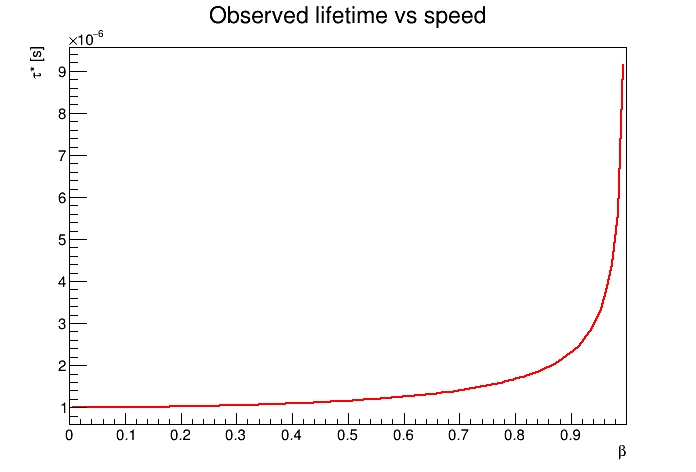

In [2]:
tau=1e-6   # lifetime
fn_tau=R.TF1("fn_tau","[0]/sqrt(1-x*x)",0.0,0.999)
fn_tau.SetParameter(0,tau)
fn_tau.SetTitle("Observed lifetime vs speed;#beta;#tau* [s]")
tc=R.TCanvas()
fn_tau.Draw()
tc.Draw()

Notice that below $\approx 0.1 c$ very litte is changing. As a rule of thumb we can mostly disregard the effects of SR at speeds below this value.

## 3. length contraction
If an object is traveling relative to an observer at a large speed, its length appears to be contracted along the direction of motion as:  $\ell' = \frac{\ell}{\gamma}$

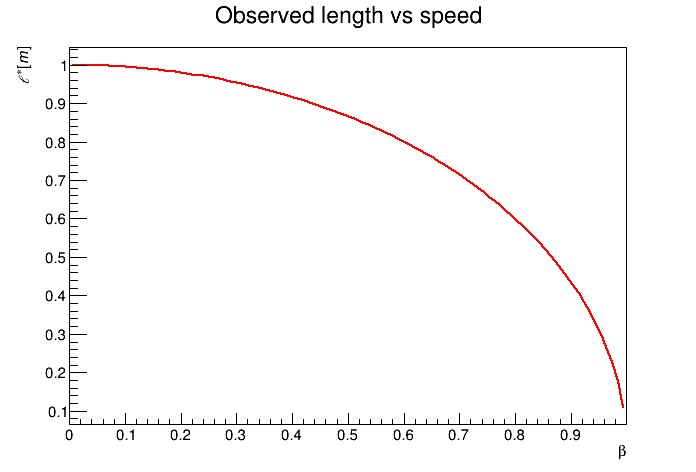

In [3]:
l0=1   # true length
fn_len=R.TF1("fn_tau","[0]*sqrt(1-x*x)",0.0,0.999)
fn_len.SetParameter(0,l0)
fn_len.SetTitle("Observed length vs speed;#beta;#{\ell^*} [m]")
tc=R.TCanvas()
fn_len.Draw()
tc.Draw()

## 4. velocity addition
With $c$ being the hard speed limit for relative motion in the universe velicity addition is affected.  Imagine we are standing on a train platform watching a train pass by at $v_1=100$ km/hr.  A basball pitcher on the train who has a $v_2=160$ km/hr fast ball throws a pitch in the direction the train is moving.  Classically, we would say that the ball is moving at $v=260$ km/hr from our perspective on the platform.  If the velicities above were to get close to $c$, their simple addition could exceed the speed of light.  Instead, velocity addition for relativistic systems occurs as: $v=\frac{v_1+v_2}{1+v_1v_2/c^2}$.  

Note: here and below, we will measure velocity as a fraction of $c$ (eg in units of $\beta$).  This allows us to treat $c=1$ in the folloing work.

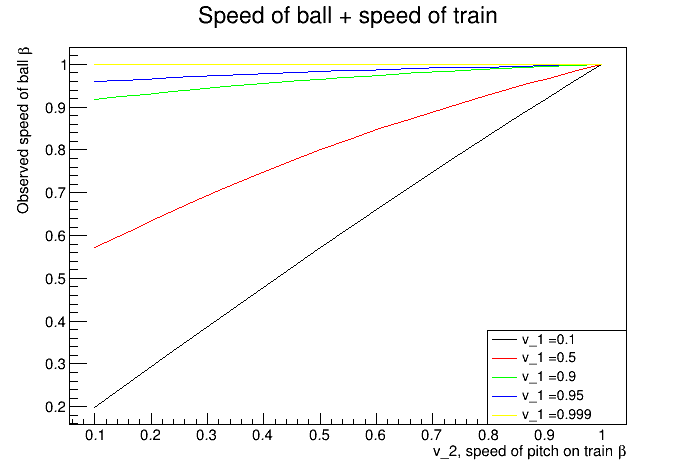

In [4]:
def addV(v1,v2):
    return (v1+v2)/(1+v1*v2)

v_1=[0.1,0.5,0.9,0.95,0.999]     # speed of train in units of beta
v_2=[0.1,0.5,0.9,0.95,0.999]     # speed of pitch in units of beta
mg=R.TMultiGraph()
tl=R.TLegend(.7,.1,.9,.3)
k=1
for v1 in v_1:
    gr=R.TGraph()
    for v2 in v_2:
        gr.SetPoint(gr.GetN(),v2,addV(v1,v2))
    gr.SetLineColor(k)
    k=k+1
    tl.AddEntry(gr,f'v_1 ={v1}','l')
    mg.Add(gr)
mg.SetTitle("Speed of ball + speed of train;v_2, speed of pitch on train #beta;Observed speed of ball #beta")
mg.Draw('ac')
tl.Draw()
tc.Draw()

## 5. mass is energy

$E_0 = m_0 c^2$, here $m_0$ is called the *rest mass* of a particle.  $E_0$, the *rest energy* is the energy equivalent of the particle's mass.  If a particle and its antimatter cousin touch, they annihilate into pure energy (a pair of photons).  The total energy of these photons is measuered to be $2m_0c^2$.  A lot of energy is accociated with mass.  In the aweful, but popular, Divinci Code book a terrorist acquires a bottle of antimatter and plans 'detonate' it to cause a disaster.  Just how much energy is stored in a gram of matter/antimattter?

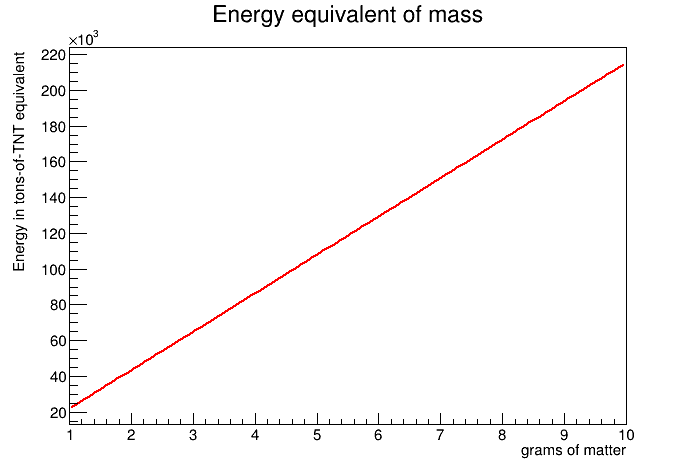

In [5]:
fn_Emc2=R.TF1("fn_Emc2","(x/1000)*9e16*2.39e-10",1,10)
fn_Emc2.SetTitle("Energy equivalent of mass;grams of matter;Energy in tons-of-TNT equivalent ")
fn_Emc2.Draw()
tc.Draw()

## 6. relavitistic energy and momentum
*Relativistic energy* is defined as the total energy of a particle, which is a combination of its rest energy and its kinetic energy.  

Classically we define energy and momentum as: $E = \frac{1}{2}mv_2$ and $p=mv$<br>
For relativistic particles these are modified:
  * kinetic energy = $(\gamma-1)m_0c^2$
  * momentum = $\gamma m_0 v$
  * total energy = $\gamma m_0 c^2 = mc^2$
  
Another interpretation of the last equation is that the mass of a particle effectively increses with its relative velocity.  Practically what this means is that as an object approaches the speed of light ($\gamma >> 1$) its effective mass increases making it that much harder to accelerate, such that it would require an infinite amount of energy to accelerate any object to the speed of light.  The only thing that travels at the speed of light is light and light has no mass!

Fermilab Tevatron Accelerator, proton beta = 0.9999995609020376
CERN LHC Accelerator, proton beta = 0.9999999910244056


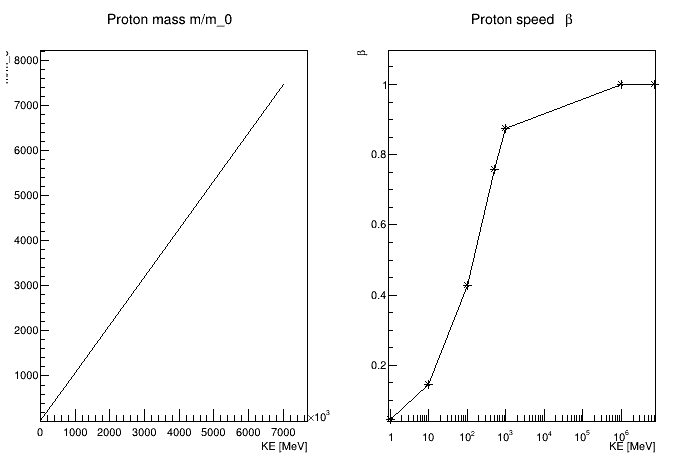

In [6]:
import numpy as np
# mass of proton
m0 = 938 # in MeV = 1.67e-27 kg

# Properties of proton accelerated to high kinetic energy
K=np.array([1,10,100,500,1e3,1e6,7e6])  # kinetic energy in MeV
gamma=K/m0+1
m=gamma*m0
tg_m=R.TGraph(len(K),K,m/m0)
tg_m.SetTitle("Proton mass m/m_0;KE [MeV];m/m_0")
beta=np.sqrt(1.-1./gamma**2)
tg_beta=R.TGraph(len(K),K,beta)
tg_beta.SetTitle("Proton speed #beta;KE [MeV];#beta")
tc2=R.TCanvas()
tc2.Divide(2,1)
tc2.cd(1); tg_m.Draw('ac')
tc2.cd(2).SetLogx(); tg_beta.Draw('al*')
tc2.Draw()
print(f'Fermilab Tevatron Accelerator, proton beta = {beta[-2]}')
print(f'CERN LHC Accelerator, proton beta = {beta[-1]}')

## 7. energy-momentum vector
The idea of space-time coordinates was introduced above.  The location of an object/event in space time is denoted as $(x,y,z,t)$.  Similarly, the energy-momentum vector for a particle is typically written as $(p_x,p_y,p_z,E)$, where the components represent the relativistic momentum and total energy. The space-time and energy-momentum are represented by special vectors called 4-vectors or Lotentz vectors.  They are implemented in ROOT via the [TLorentzVector](https://root.cern.ch/doc/master/classTLorentzVector.html) class.

Four-vectors can be added like normal vectors (each component adds separately), but they also have a number of interesting properties.  One important property is *invariant quantities*.  The magnitude of a 4-vector $(a,b,c,d)$, calculated as $\sqrt{d^2-(a^2+b^2+c^2)}$, is invariant wrt reference frame.

Let's look at an example of a proton at rest in the lab: $\vec p=0, E=m_0$  (recall we set $c=1$ for convenience!).  The energy-momentum vector for this proton is just: $p^\mu = (p_x,p_y,p_z,m) = (0,0,0,m0)$ and $|p| = \sqrt{m+0^2-0-0-0} = m_0$  We call this the *invariant mass* of the proton.

What if we measure a proton moving (relative to us in the lab) in the $z$ direction with $\beta_z=0.999$?
See below:

In [7]:
from math import sqrt
m0=938   # MeV
# calculate new quantities momentum and E after 'boosting' proton to high velocity
bz=0.999
gamma=sqrt(1.0/(1.0-bz**2))
E=m0*gamma
pz=m0*gamma*bz  # m0*gamma*v
tl0=R.TLorentzVector(0,0,0,938)  # proton at rest in lab frame
print("invariant mass of proton in lab",tl0.Mag())
tlz=R.TLorentzVector(0,0,pz,E)   # proton moving
print("invariant mass of proton in its moving frame",tlz.Mag())

invariant mass of proton in lab 938.0
invariant mass of proton in its moving frame 938.0000000000636


The quantity $|p|$ is a constant in all reference frames.  What this means is that if the proton and I are sitting in the lab, I measure its rest mass as $m_0$.  But if the proton and I are together moving a velocity $\beta$, I still measure its mass to be $m_0$. 

4-vectors make certain calculations easy, for example:

In [8]:
p4_pr=R.TLorentzVector(0,0,0,938)  # proton at rest
print("E proton at rest",p4_pr.E(),"MeV")
p4_pr.Boost(0,0,0.9999)            # boost (accelerate) to beta=0.9999 in z direction
print("E proton after acceleration",p4_pr.E(),"MeV")
print("gamma=",p4_pr.Gamma())

E proton at rest 938.0 MeV
E proton after acceleration 66328.27430289582 MeV
gamma= 70.71244595187527


Next we illustrate how to get information about the motion of the particle from its 4-vector

In [9]:
from math import pi, sin, cos
p4_pr=R.TLorentzVector(0,0,0,938)  # proton at rest
p4_pr.Boost(0.75,0,0)              # boost (accelerate) to beta=0.75 in x direction
beta=p4_pr.Beta()
print("particle beta:",beta)
p4_pr.RotateZ(pi/4)
phi=p4_pr.Phi()
print("particle angle in x-y plane:",phi*180/pi,"degrees")
print("x and y components of velocity",beta*cos(phi),beta*sin(phi))

particle beta: 0.75
particle angle in x-y plane: 45.0 degrees
x and y components of velocity 0.5303300858899107 0.5303300858899106


## 8. forces and acceleration
In classical physics, we write Newton's force law as $F = ma$<br>
For the relativistic case, there needs to be a modification.  First, we typically write acceleration explicitly as the *change in velocity per unit time* $a = \frac{dv}{dt}$ and then correct for the change in mass wrt velocity $m_0\to \gamma m_0$.  Then the force can be written as:

$F = m_0 \frac{ \gamma dv}{dt}$  and $\frac{dv}{dt} = \frac{F}{\gamma m_0}$

For a fast moving object (large $\gamma$) even a large force causes very little change in the velocity of an object.

### a closer look at acceleration 

Recall the velocity addition comments above.  Adding velocities is not a liner process in SR.  The same is true for how we treat acceleration.  For example, for 2D motion the equation $v_{tot}^2 = v_x^2+v_y^2$ holds for relativistic systems just as is does for classical systems.  But in SR if we accelerate in the $y$ direction, we need to be sure that the TOTAL velocity never exceeds $c$.  Unlike the classical case then, for the 2D problem in $x,y$, an acceleration in $y$ can actually affect the velocity in $x$!!!!

The force equations above are valid, but there is a complication b/c $\gamma$ also depends on $v$.  For a 2D system subject to a force in the $y$ direction only, the acceleration in SR is given by:
$$ a_y = \frac{dv_y}{dt} = \frac{1}{m_0\gamma}\left(F_y - \frac{F_yv_y^2}{c^2}\right)
\\
a_x = \frac{dv_x}{dt} = -\frac{1}{m_0\gamma}F_y\frac{v_xv_y}{c^2}
$$
Conceptually, what's going on is that as we accelerate in $y$, we must slow down in $x$ to continue to satisify $|\vec v| < c$.  Consider the above equation in the classical limit, $c<<c, \gamma=1$.  They reduce to: 
$$ a_y = \frac{dv_y}{dt} = \frac{1}{m_0}F_y 
\\
a_x = \frac{dv_x}{dt} = 0,
$$
which is what we learned from Newton!

## 9. combining 4-vectors
Combining 4 vectors provides a very powerful tool to study particle interactions and decays.  Below we define two energy-momentum 4-vectors for a pair of muons ($\mu^+,\mu^-$) produced in a certain physics interaction.  

In [10]:
# quantities in GeV below
mup=R.TLorentzVector(-4.3418112980e+02, -2.0339029669e+02, 4.4874018079e+02, 6.5669522316e+02)
mum=R.TLorentzVector(-6.1751481870e+02, -1.9170215330e+02, 5.2458391412e+02, 8.3262389459e+02)
# add these two particle vectors
p4_tot=mup+mum
print("parent particle mass:",p4_tot.M(),"GeV")  # =Mass, shorthand for Mag()

parent particle mass: 92.46203887462124 GeV


The combined emergy-momentum of the muons "reconstructs" to the mass of a Z boson! This is an example of how we can use combinations of detected particles to measure properties of very short lived particles produced in our collisions.  The life time of the Z boson is very short (~1e-25 seconds), so it travels only a few percent the width of a proton before it decays.  We can never see one of these particles directly, but when it decays, its mass is preserved in the rest mass and kinetic energies of the much lighter muons in this case.  Energy is conserved!

# Exercise
Revisit the projectile motion problem with the following inital parameters:
  * m = 1 gram
  * v0 = 0.9c
  * launch angle = 45 degrees
  * downward force = 30000 Newtons
  * no air resistance

Represent the projectile by its energy-momentum vector, tracing its path until it reaches the ground and plot:
  * the trajectory y vs x
  * the kinetic energy vs time
  * beta_x vs time
  * beta_y vs time

In [43]:
import ROOT as R
import matplotlib.pyplot as plt
from math import pi,sqrt,sin,cos

#initial conditions, note it's easier to set c=1
# if you need to get energy in Joules later, just multiply by c_mks
c=299792458.   # ~3e8 m/s
m=0.001            # kg
E0=m               # really mc^2, but c=1
beta=0.9           #initial velocity
phi=45*pi/180      #launch angle
gamma=1/sqrt(1-0.9**2)
f_y = -30000        #Newtons
x = 0
y = 0
t = 0
dt = 0.01

x_vals = []
y_vals = []
t_vals = []
ke = []
beta_x = []
beta_y = []

proj = R.TLorentzVector(0,0,0,E0)
proj.Boost(beta*cos(phi),beta*sin(phi),0) #initialize E-P Vector

while y >= 0:
    vx = proj.Beta()*cos(proj.Phi())
    vy = proj.Beta()*sin(proj.Phi())
    
    #update position
    x = x + vx*c*dt
    y = y + vy*c*dt
    
    #update acceleration
    a_x = -1*(1/(m*proj.Gamma()))*(f_y*vx*vy/c**2) #not sure if i need to do this?
    a_y = (1/(m*proj.Gamma()))*(f_y - ((f_y*(vy**2)))/c**2)
    
    #update vector
    proj.Boost(a_x*dt/c, a_y*dt/c, 0)
    
    #time dilation
    t += proj.Gamma()*dt
    
    #store values
    x_vals.append(x)
    y_vals.append(y)
    t_vals.append(t)
    ke.append((proj.Gamma()-1)*m*c)
    beta_x.append(proj.Beta()*cos(proj.Phi()))
    beta_y.append(proj.Beta()*sin(proj.Phi()))
    
    
#print((t_arr))


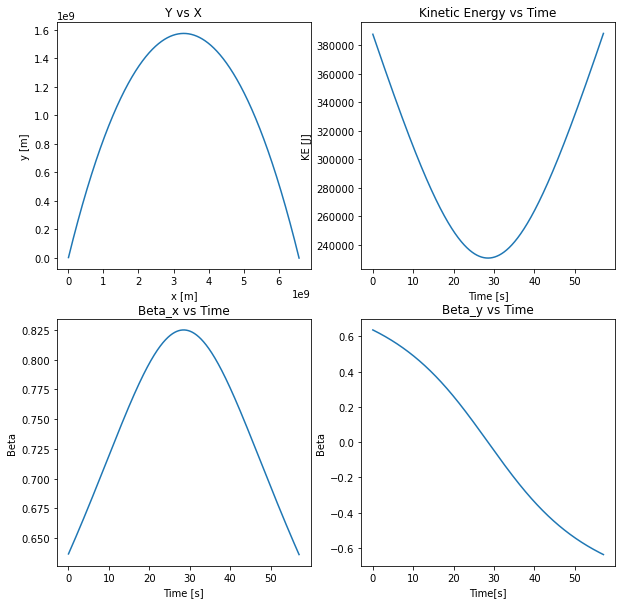

In [44]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(x_pos, y_pos)
plt.title('Y vs X')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.subplot(2,2,2)
plt.plot(t_arr, ke)
plt.title('Kinetic Energy vs Time')
plt.xlabel('Time [s]')
plt.ylabel('KE [J]')

plt.subplot(2,2,3)
plt.plot(t_arr, beta_x)
plt.title('Beta_x vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Beta')

plt.subplot(2,2,4)
plt.plot(t_arr, beta_y)
plt.title('Beta_y vs Time')
plt.xlabel('Time[s]')
plt.ylabel('Beta');